In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from google.colab import files

In [ ]:
df = pd.read_excel('4BC.xlsx')

In [ ]:
df.head()

,id,B.C.,FF,Rs,Rsh,VOC(mV),jsc(µA/cm2)
0,1,Ag,42.050778,1201.02073,3207157.274,313.589943,9.080000
1,2,Ag,31.448339,23063.72733,1139940.919,305.736250,14.441089
2,3,Ag,44.528443,77754.33149,2474439.611,403.290236,14.900000
3,4,Ag,42.470062,60349.26229,2323488.838,402.432026,14.800000
4,5,Ag,42.710457,141620.04100,2582383.661,407.892966,13.500000


#1. Using PCA on the features

Separating the features from the target column

In [ ]:
features = df.drop(['B.C.', 'id'], axis=1)
target = df['B.C.']

Noramlizing the features

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Performing PCA

In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)

#2. Displaying the 3D graph

Creating the new DataFrame for the PCs

In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['B.C.'] = target

Displaying

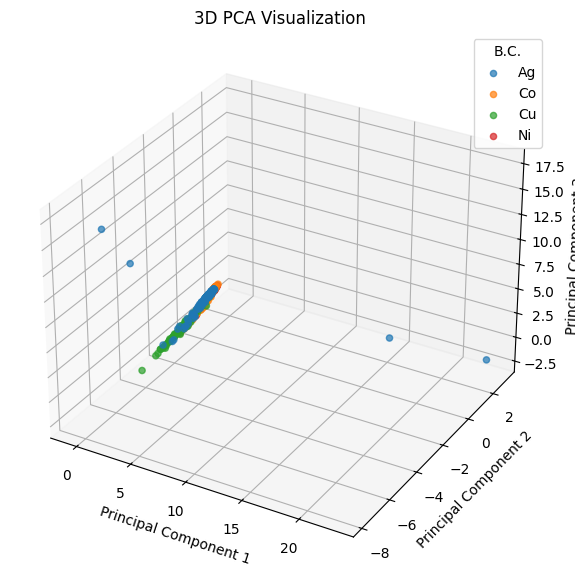

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

unique_targets = pca_df['B.C.'].unique()

for target in unique_targets:
    subset = pca_df[pca_df['B.C.'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=target, alpha=0.7)

ax.set_title("3D PCA Visualization")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(title="B.C.")
plt.show()

#3. Explained Variance & Eigenvalue

In [ ]:
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

print("Explained Variance Ratios:", explained_variance)
print("Eigenvalues:", eigenvalues)
print("Total Explained Variance:", sum(explained_variance))

Explained Variance Ratios: [0.29588819 0.25891226 0.19897799]
Eigenvalues: [1.48214067 1.29692364 0.99670546]
Total Explained Variance: 0.753778445105806


#4. Finding & Removing Ouliers

In [ ]:
pca_space = principal_components
pca_mean = np.mean(pca_space, axis=0)
distances = np.sqrt(np.sum((pca_space - pca_mean) ** 2, axis=1))

# Points farther than 3 standard deviations)
threshold = np.mean(distances) + 3 * np.std(distances)
outliers = np.where(distances > threshold)[0]

print("\nOutliers:")
print(df.iloc[outliers])


Outliers:
      id B.C.           FF            Rs           Rsh  VOC(mV)  jsc(µA/cm2)
89    90   Ag     0.000000  1.453024e+04  5.247565e+09    0.000          0.0
91    92   Ag     0.000000  2.778976e+09  2.361252e+09    0.000          0.0
100  101   Ag  8272.050148  3.562224e+05  6.836334e+03    1.830         10.6
104  105   Ag  5585.794646  3.819499e+05  3.200266e+03    0.899         10.9


We can see the outliers from the 3D visualiztion and from the outlier detection above.
These 4 outliers (id: 90,92,101,105) have very high/low values that don't correspond with the rest of their respected features.
The other outlier (id: 248) was not found in the in the code detection above but we could detect it in the 3D visualization. Going through the Dataset we could find this outlier that only has it's "Rs" value to be very low while the rest of it's values are normal.

#5. Removing outliers & Repeating steps 2,3

Creating new DataFrame without the outliers mentioned in previous step

In [ ]:
df_cleaned = df.drop(index=[89, 91, 100, 104, 249])
features_cleaned = df_cleaned.drop(['B.C.', 'id'], axis=1)
target_cleaned = df_cleaned['B.C.']

Scaling & PCA

In [ ]:
features_scaled_cleaned = scaler.fit_transform(features_cleaned)

pca_cleaned = PCA(n_components=3)
principal_components_cleaned = pca_cleaned.fit_transform(features_scaled_cleaned)

Creating the new DataFrame

In [ ]:
target_cleaned = target_cleaned.reset_index(drop=True)
pca_df_cleaned = pd.DataFrame(data=principal_components_cleaned, columns=['PC1', 'PC2', 'PC3'])
pca_df_cleaned['B.C.'] = target_cleaned

Displaying 3D graph for the cleaned DataFrame

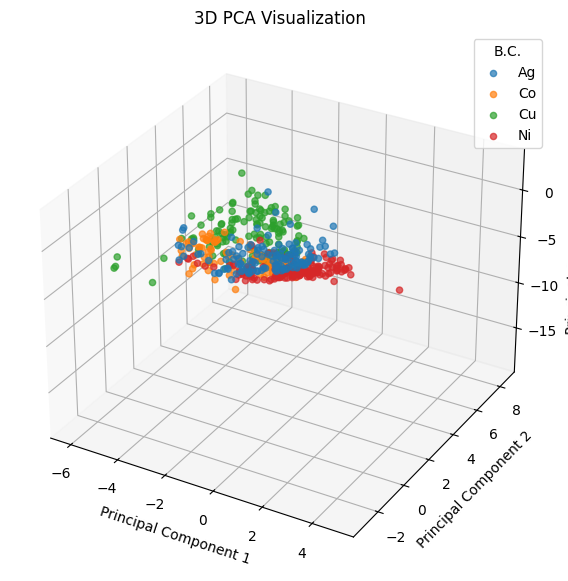

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

unique_targets = pca_df_cleaned['B.C.'].unique()

for target in unique_targets:
    subset = pca_df_cleaned[pca_df_cleaned['B.C.'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=target, alpha=0.7)

ax.set_title("3D PCA Visualization")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(title="B.C.")
plt.show()

#6. Using a different method (LDA)

Using the cleaned features from previous steps for LDA

In [ ]:
features_scaled_cleaned = scaler.fit_transform(features_cleaned)

lda = LDA(n_components=3)
lda_components = lda.fit_transform(features_scaled_cleaned, target_cleaned)

Creating the new DataFrame

In [ ]:
lda_df = pd.DataFrame(data=lda_components, columns=['LDA1', 'LDA2', 'LDA3'])
lda_df['B.C.'] = target_cleaned.reset_index(drop=True)
lda_df['B.C.'] = target_cleaned

Displaying 3D graph for the cleaned DataFrame

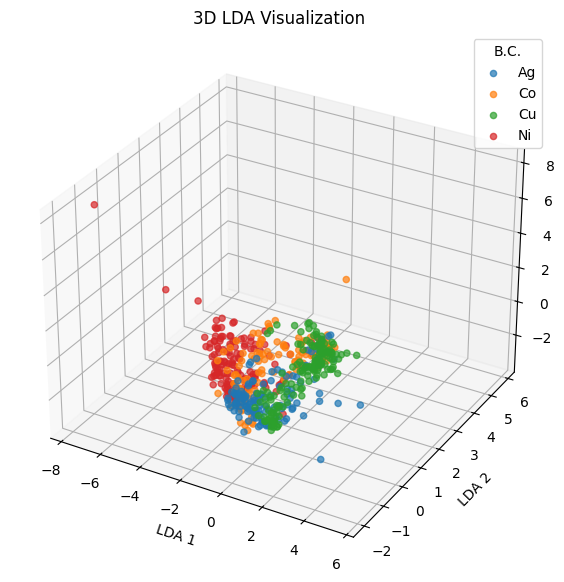

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

unique_targets = lda_df['B.C.'].unique()

for target in unique_targets:
    subset = lda_df[lda_df['B.C.'] == target]
    ax.scatter(subset['LDA1'], subset['LDA2'], subset['LDA3'], label=target, alpha=0.7)

ax.set_title("3D LDA Visualization")
ax.set_xlabel("LDA 1")
ax.set_ylabel("LDA 2")
ax.set_zlabel("LDA 3")
ax.legend(title="B.C.")
plt.show()